In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import networkx as nx

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
pd.set_option('display.max_columns', None)

In [3]:
# Reading in the full dataset containing the election data and demographic data
UK_fulldataset=pd.read_csv('UK results/Output datasets/UK_fulldataset.csv')

In [5]:
UK_fulldataset.describe()

,qunone,qu1,qu2,qu3,qu4,quother,White,nssec_student,nssec_higher_managerial,nssec_intermediate,nssec_lower_managerial,nssec_lower_supervisory,nssec_unemployed,nssec_routine,nssec_semi_routine,nssec_small_employers,age_under18,age_1824,age_2534,age_3549,age_5064,age_over65,Urban,dep_none,dep_one,dep_two_more,Con2015,Lab2015,Con2017,Lab2017,Con2019,Lab2019,Leave
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,18.344358,9.687688,13.519807,16.991235,33.281577,8.175334,83.320138,7.443826,12.861568,11.510671,19.897052,5.481338,8.499928,12.207582,11.524532,10.573503,20.628336,8.150494,13.179286,19.029094,19.732366,19.280423,81.205317,48.159476,33.500218,18.340307,38.957220,33.168109,44.103961,43.364827,46.019796,35.387485,53.490368
std,4.513158,1.799217,2.166819,2.616453,8.904767,1.441808,17.187904,4.689585,4.916367,1.685223,3.136409,1.234412,3.105058,3.762060,2.369752,2.541469,2.636286,3.721713,3.309920,2.196104,2.531190,5.449609,24.289909,5.850301,1.804947,4.610530,14.998623,16.797796,14.954541,17.622610,15.862568,17.275692,10.826684
min,7.632717,4.058510,6.074487,10.665729,17.496543,3.358329,19.785947,3.281310,3.791793,6.139769,9.823379,2.232845,4.118240,4.034534,5.217609,5.028186,11.339911,5.095645,8.015132,13.520237,10.385628,5.096393,0.000000,28.723889,26.818719,9.227454,4.692342,5.432687,7.300938,8.134796,7.817917,4.350053,20.500000
25%,14.826601,8.689393,12.707194,15.866746,26.773171,7.332807,76.940523,4.814427,9.254477,10.629584,17.800097,4.694593,6.134277,9.359539,9.975874,8.651265,18.932548,6.214611,11.091408,17.615539,18.321889,15.775033,67.863467,44.031264,32.406731,14.714759,25.132182,17.796761,32.309192,28.597163,34.600040,21.356739,47.800000
50%,17.818865,9.858893,14.151689,17.041423,31.953356,8.483906,90.222995,5.588349,11.892638,11.703189,20.153977,5.547279,7.809327,11.968577,11.689914,10.379285,20.488890,6.914953,12.761083,18.786892,20.223352,19.401804,93.643150,47.948375,33.579044,18.056257,42.865426,33.947608,46.845273,42.998333,49.555957,35.609135,55.100000
75%,21.276969,10.987815,15.007650,17.981910,37.366337,9.214379,95.940644,8.213358,15.555641,12.767245,22.246691,6.282807,10.217715,14.621648,13.410349,12.058502,22.223464,8.316538,14.143054,20.365900,21.463525,23.005534,100.000000,52.240083,34.710119,21.544478,51.448913,46.445317,56.806613,57.569030,58.848862,48.008407,60.650000
max,32.844678,13.644305,17.483238,32.573237,65.490725,12.519371,98.547692,34.514461,30.186697,16.262269,26.287375,9.248339,24.746934,25.260188,17.185913,18.887778,31.027280,30.344603,30.634217,26.777465,25.193532,35.180437,100.000000,62.194107,38.492886,33.910778,65.875926,81.300940,69.917520,85.728843,76.723807,84.681018,75.600000


### Dummies

In [6]:
## Seat gains
UK_fulldataset['Congain1917'] = np.where((UK_fulldataset['Firstparty2017']=='Lab') & (UK_fulldataset['Firstparty2019'] =='Con'), 100, 0)
UK_fulldataset['Congain1715'] = np.where((UK_fulldataset['Firstparty2015']=='Lab') & (UK_fulldataset['Firstparty2017'] =='Con'), 100, 0)

In [7]:
## Vote share gains
UK_fulldataset['Conswing1917']=UK_fulldataset['Con2019']-UK_fulldataset['Con2017']
UK_fulldataset['Conswing1715']=UK_fulldataset['Con2017']-UK_fulldataset['Con2015']


In [8]:
UK_fulldataset.head()

,ONSConstID,Constituency,qunone,qu1,qu2,qu3,qu4,quother,White,nssec_student,nssec_higher_managerial,nssec_intermediate,nssec_lower_managerial,nssec_lower_supervisory,nssec_unemployed,nssec_routine,nssec_semi_routine,nssec_small_employers,age_under18,age_1824,age_2534,age_3549,age_5064,age_over65,Urban,dep_none,dep_one,dep_two_more,County name,Con2015,Lab2015,Firstparty2015,Con2017,Lab2017,Firstparty2017,Con2019,Lab2019,Firstparty2019,Leave,Congain1917,Congain1715,Conswing1917,Conswing1715
0,E14000530,Aldershot,17.846841,11.905262,14.365447,17.364972,29.787469,8.730010,78.450492,4.921475,12.860158,13.605066,20.880627,6.207933,7.992838,10.865265,13.233718,9.432920,21.012199,7.680339,15.820368,21.201379,18.506895,15.778819,100.000000,51.504449,32.822677,15.672874,Hampshire,50.592107,18.332576,Con,55.056180,31.617978,Con,58.374364,23.537511,Con,57.9,0,0,3.318184,4.464073
1,E14000531,Aldridge-Brownhills,22.310632,10.832655,14.345906,17.334440,26.292212,8.884155,88.662237,5.038608,10.547089,13.129826,20.119974,6.388711,7.951822,13.605964,13.266089,9.951916,20.117185,6.590690,11.270363,17.345953,21.471895,23.203915,98.033917,45.428223,34.587016,19.984761,West Midlands,52.049523,22.368788,Con,65.408227,29.849633,Con,70.789487,20.370088,Con,67.8,0,0,5.381260,13.358704
2,E14000532,Altrincham and Sale West,11.493341,7.178461,12.232208,14.119024,48.655691,6.321275,80.561418,6.170540,23.901714,11.695325,24.218927,3.436469,6.202009,6.329146,7.973112,10.072757,23.947389,5.695553,9.729244,21.603207,19.742871,19.281736,98.550923,58.874469,29.296175,11.829355,Greater Manchester,52.994042,26.686066,Con,51.019132,38.846372,Con,48.045213,36.835089,Con,38.6,0,0,-2.973919,-1.974909
3,E14000533,Amber Valley,21.687309,11.381604,14.819950,18.386284,24.324396,9.400456,97.683919,4.028904,9.574979,11.290796,18.115401,7.797835,7.597856,17.975416,13.815860,9.802954,18.890223,6.501603,12.502065,17.659952,22.212065,22.234093,83.240972,46.158414,34.256304,19.585282,Derbyshire,43.979264,34.781372,Con,56.547554,38.429635,Con,63.853227,26.795707,Con,65.3,0,0,7.305673,12.568290
4,E14000534,Arundel and South Downs,13.796626,9.327442,15.209457,17.345346,36.619993,7.701136,96.465828,4.811202,17.431424,12.019970,24.398026,4.655113,5.087800,7.057271,9.134626,15.404568,18.665995,5.533022,8.243016,16.353999,22.870143,28.333824,23.364779,55.445987,32.839158,11.714854,West Sussex,60.787577,11.197479,Con,62.355616,22.719729,Con,57.917535,15.831813,Con,49.7,0,0,-4.438081,1.568039


In [9]:
# Dataset utilised to build BM plot, epsilon=20 utilised throughout
bmx1=UK_fulldataset[['qunone', 'qu1', 'qu2', 'qu3', 'qu4',
       'quother', 'White', 'nssec_student', 'nssec_higher_managerial',
       'nssec_intermediate', 'nssec_lower_managerial',
       'nssec_lower_supervisory', 'nssec_unemployed', 'nssec_routine',
       'nssec_semi_routine', 'nssec_small_employers', 'age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban',
       'dep_none', 'dep_one', 'dep_two_more']]

## Vote Shares

TDABM plots coloured by different election result vote shares.  

### Conservative 2019

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


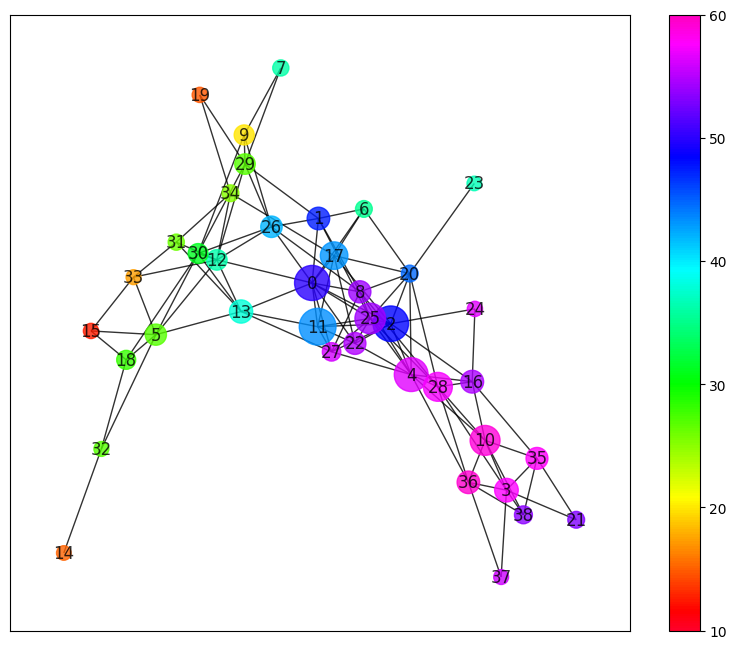

In [10]:
cdf = pd.DataFrame(UK_fulldataset['Con2019'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2019',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=10,MAX_VALUE=60)
plt.savefig('UK results/Main results/UK_mainresult_con2019.png')
plt.show() 

### Labour 2019

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


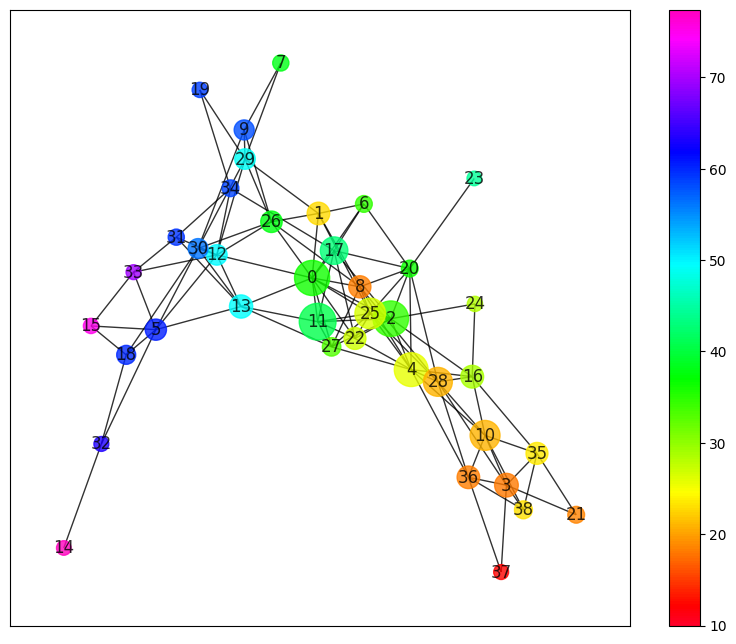

In [11]:
cdf = pd.DataFrame(UK_fulldataset['Lab2019'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Lab2019',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=10,MAX_VALUE=60)
plt.savefig('UK results/Main results/UK_mainresult_lab2019.png')
plt.show() 

### Conservative 2017

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


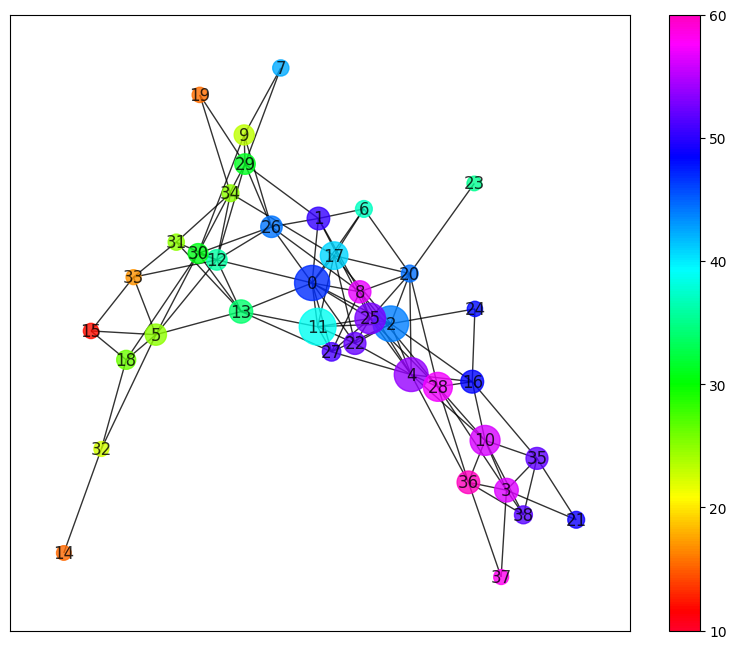

In [12]:
cdf = pd.DataFrame(UK_fulldataset['Con2017'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2017',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=10,MAX_VALUE=60)
plt.savefig('UK results/Main results/UK_mainresult_con2017.png')
plt.show()

### Conservative 2015

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


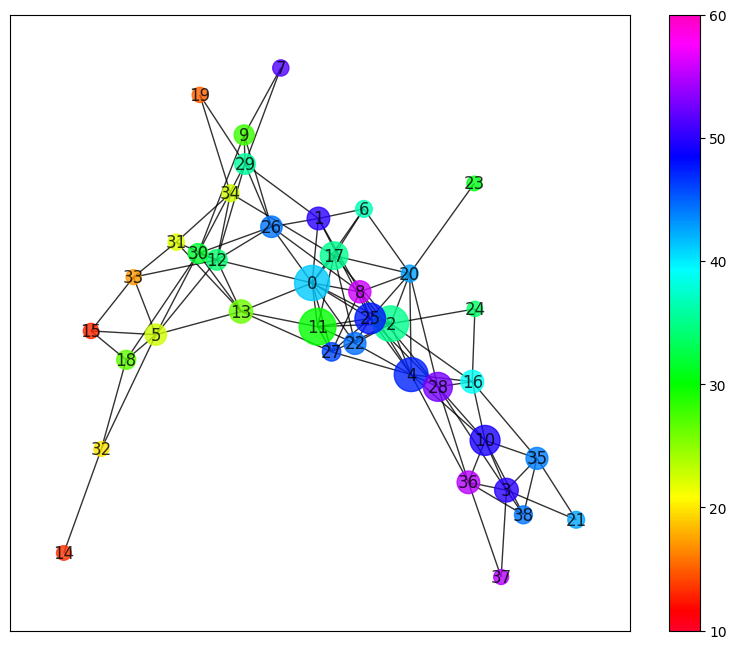

In [13]:
cdf = pd.DataFrame(UK_fulldataset['Con2015'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Con2015',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=10,MAX_VALUE=60)
plt.savefig('UK results/Main results/UK_mainresult_con2015.png')
plt.show()

### Leave

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


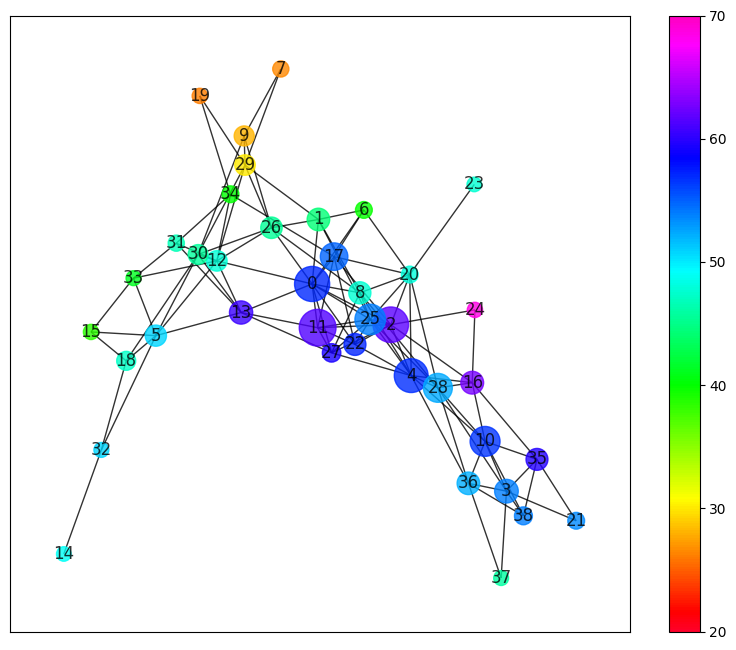

In [14]:
cdf = pd.DataFrame(UK_fulldataset['Leave'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Leave',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=20,MAX_VALUE=70)
plt.savefig('UK results/Main results/UK_mainresult_leave.png')
plt.show()

## Gains

### Conservative seat 2015 to 2017

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


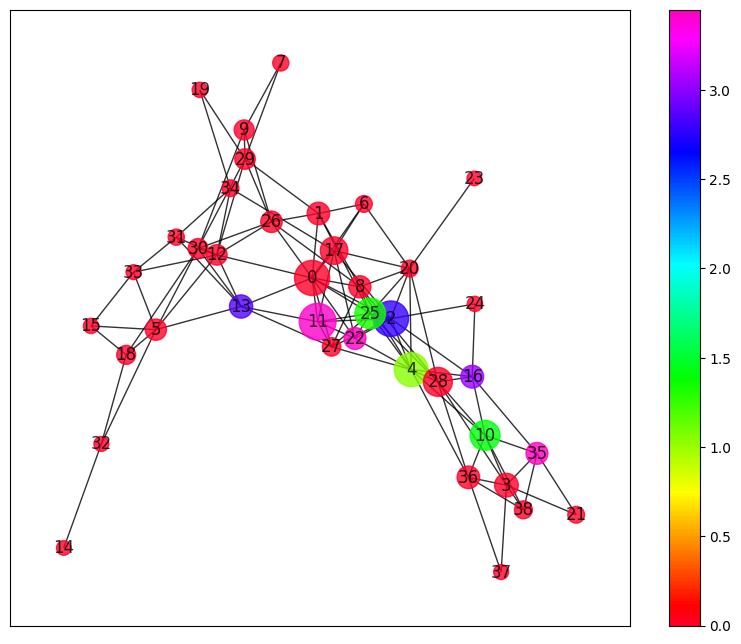

In [15]:
cdf = pd.DataFrame(UK_fulldataset['Congain1715'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Congain1715',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
plt.savefig('Figures/UK_1715_seat_gain.png')
plt.show()

### Conservative seat gains 2017 to 2019

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


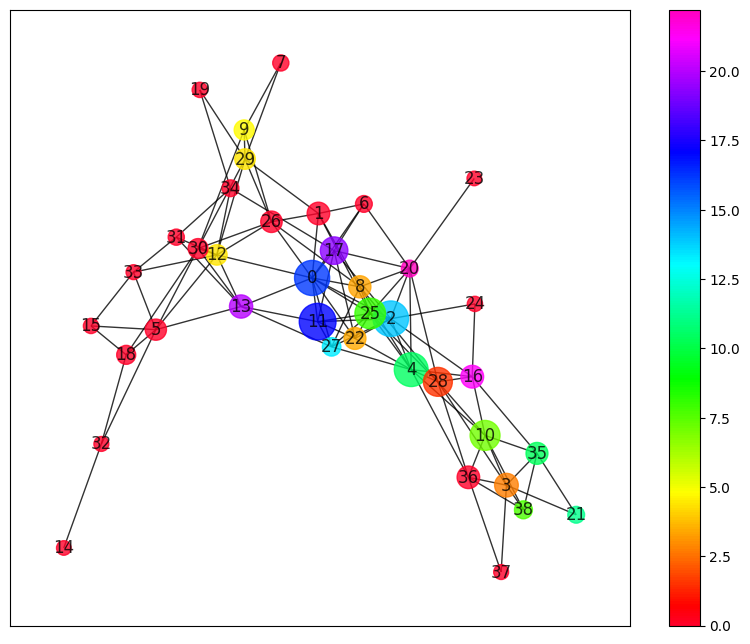

In [16]:
cdf = pd.DataFrame(UK_fulldataset['Congain1917'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Congain1917',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
plt.savefig('UK results/Main results/UK_1917_seat_gain.png')
plt.show()

### Conservative vote gains 2015 to 2017

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


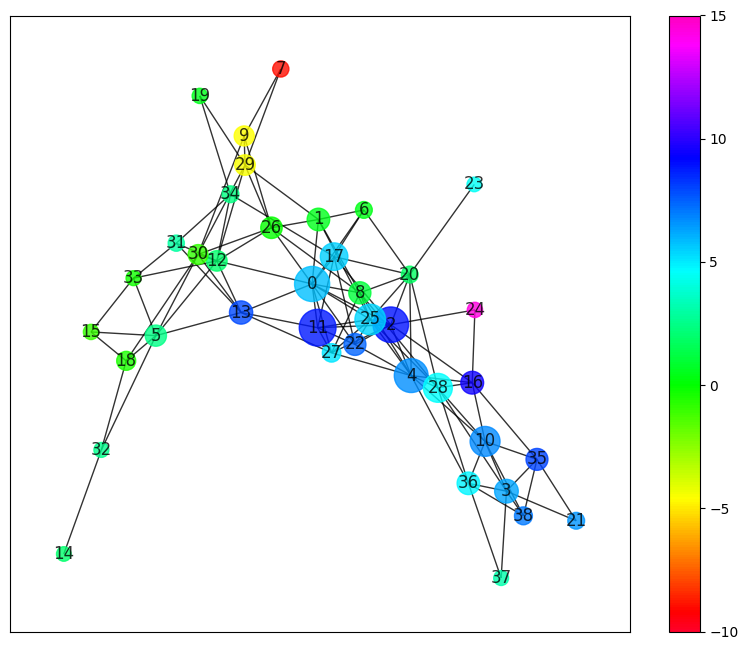

In [17]:
cdf = pd.DataFrame(UK_fulldataset['Conswing1715'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Conswing1715',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=-10,MAX_VALUE=15)
plt.savefig('UK results/Main results/UK_1715_votegain.png')
plt.show()

### Conservative vote gains 2017 to 2019

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


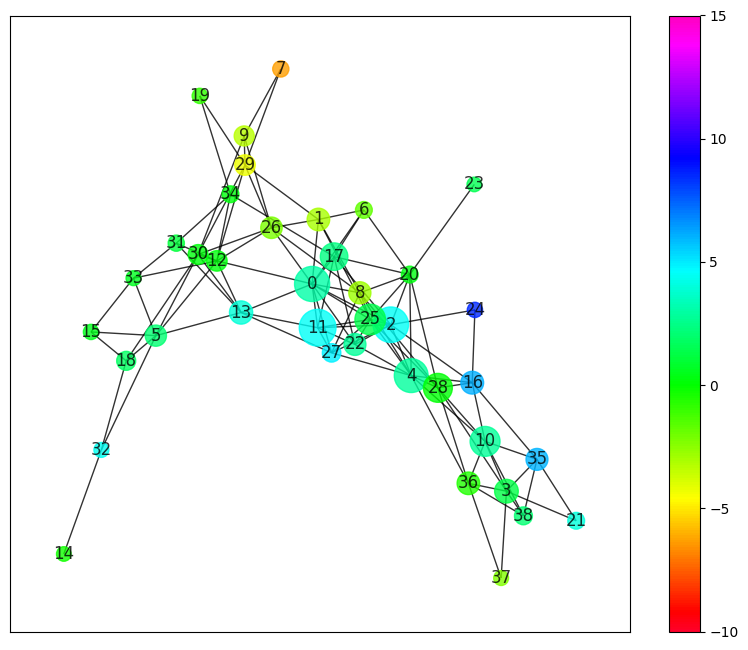

In [18]:
cdf = pd.DataFrame(UK_fulldataset['Conswing1917'])
bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='Conswing1917',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5),MIN_VALUE=-10,MAX_VALUE=15)
plt.savefig('UK results/Main results/UK_1917_votegain.png')
plt.show()

## Analysing the balls

In [20]:
UK_results=UK_fulldataset.copy()

In [21]:
#Extracting the balls and points 
pb1 = bm1.points_and_balls()

In [22]:
pb1

,point,ball
0,0,0
1,1,0
2,7,0
3,14,0
4,15,0
...,...,...
1206,385,38
1207,400,38
1208,409,38
1209,547,38


In [23]:
# Merging the ball clustering to the UK full dataset
UK_results['point'] = UK_results.index
UK_results =UK_results.merge(pb1, on='point')

In [25]:
#Saving the ball results
UK_results.to_csv('UK results/Output datasets/UK_ball_results.csv',index=False)

## Summary Stats of the balls

### Ball means for each variable

 Mean of each ball for the variables used in the TDABM plot

In [26]:
columns=['Con2019','Leave','qunone', 'qu1', 'qu2', 'qu3', 'qu4',
       'quother', 'White', 'nssec_student', 'nssec_higher_managerial',
       'nssec_intermediate', 'nssec_lower_managerial',
       'nssec_lower_supervisory', 'nssec_unemployed', 'nssec_routine',
       'nssec_semi_routine', 'nssec_small_employers', 'age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban',
       'dep_none', 'dep_one', 'dep_two_more']
ball_means=pd.DataFrame()
ball_means['size']=UK_results.groupby('ball').size()
for col in columns:
    ball_means[col]=UK_results.groupby('ball')[col].mean()
#saving the ball means
ball_means.to_csv('UK results/Output datasets/ball_means_UK.csv')

### Ball size and mean for Conservative vote share

Ball size and mean conservative vote 

In [28]:
ball_con_vote=pd.DataFrame()
ball_con_vote['size']=UK_results.groupby('ball').size()
ball_con_vote['Con_2019']=UK_results.groupby('ball')['Con2019'].mean()

In [42]:
ball_con_vote = ball_con_vote.round(2)
#Saving the mean conservative vote and size of each ball
ball_con_vote.to_csv('UK results/Output datasets/ball_con_UK.csv')

In [44]:
#Output to latex
ball_con_vote['Con_2019'] = ball_con_vote['Con_2019'].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
print(ball_con_vote.to_latex())

\begin{tabular}{lrl}
\toprule
 & size & Con_2019 \\
ball &  &  \\
\midrule
0 & 105 & 49.93 \\
1 & 32 & 47.34 \\
2 & 108 & 48.47 \\
3 & 37 & 57.58 \\
4 & 96 & 56.57 \\
5 & 26 & 26.96 \\
6 & 9 & 35.3 \\
7 & 7 & 36.05 \\
8 & 30 & 54.04 \\
9 & 21 & 19.86 \\
10 & 71 & 58.83 \\
11 & 117 & 43.28 \\
12 & 23 & 36.18 \\
13 & 35 & 37.9 \\
14 & 2 & 15.08 \\
15 & 4 & 12.6 \\
16 & 33 & 54.53 \\
17 & 57 & 43.17 \\
18 & 17 & 28.01 \\
19 & 4 & 14.77 \\
20 & 9 & 44.74 \\
21 & 9 & 52.99 \\
22 & 29 & 54.74 \\
23 & 2 & 36.66 \\
24 & 4 & 56.66 \\
25 & 75 & 54.28 \\
26 & 27 & 42.01 \\
27 & 15 & 55.91 \\
28 & 65 & 57.31 \\
29 & 23 & 26.87 \\
30 & 20 & 31.11 \\
31 & 7 & 26.04 \\
32 & 3 & 26.84 \\
33 & 3 & 17.39 \\
34 & 9 & 25.14 \\
35 & 29 & 57.74 \\
36 & 32 & 59.34 \\
37 & 3 & 55.77 \\
38 & 13 & 53.43 \\
\bottomrule
\end{tabular}

